#**Utilitat de la llibreria**

Permet una visualització dels diccionaris en files i columnes. Aquest format de dades permet un******

In [ ]:
import pandas as pd

#**Creació de DataFrames**

**A partir d'un diccionari**

In [ ]:
### Incorrecte
my_dict = {'Clau 1': 8,
           'Clau 2': 15}

In [ ]:
### Incorrecte
x = pd.DataFrame(my_dict)
x

ValueError: If using all scalar values, you must pass an index



*   Per tant, podem dir que per crear un DataFrame a partir d'un diccionari li hem de passar al mètode un **diccionari amb llistes**




In [ ]:
my_dict = {'Clau 1': [8,9,10],
           'Clau 2': [15,4,5]}

In [ ]:
x = pd.DataFrame(my_dict)
x

,Clau 1,Clau 2
0,8,15
1,9,4
2,10,5


*    Podem crear diccionaris amb llistes que tinguin diferent longitud?


In [ ]:
my_dict = {'Clau 1': [8,9,10, 12],
           'Clau 2': [15,4,5]}

In [ ]:
x = pd.DataFrame(my_dict)
x

ValueError: All arrays must be of the same length

**Sintaxi més habitual**

In [ ]:
data = pd.DataFrame({'Columna 1': [1,2,3],
                     'Columna 2' : [4,5,6]})
data

,Columna 1,Columna 2
0,1,4
1,2,5
2,3,6


**Opcions en la creació de DataFrames**

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html

In [ ]:
x = pd.DataFrame(data=None, index=None, columns=None)



*   data : ha de ser un diccionari o un altre DataFrame
*   index : llista o tupla amb els noms que volem assignar a les files. **Ha de tenir la mateixa longitud que les llistes del diccionari**
*   columns : llista o tupla amb el nom que volem donar a les columnes del diccionari (si les volem canviar). **Hi ha d'haver tants d'argumens com columnes té el diccionari**



In [ ]:
x = pd.DataFrame(data = {'Columna 1': [1,2,3], 'Columna 2' : [4,5,6]},
                 index = ['Fila 1', 'Fila 2', 'Fila 3'])
x

,Columna 1,Columna 2
Fila 1,1,4
Fila 2,2,5
Fila 3,3,6


#**Accés als elements**

**Accés a totes les files**

In [ ]:
x

,Columna 1,Columna 2
Fila 1,1,4
Fila 2,2,5
Fila 3,3,6


In [ ]:
x.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
type(x.index)

pandas.core.indexes.base.Index

**Accés a totes les columnes**

In [ ]:
x.columns

Index(['Clau 1', 'Clau 2'], dtype='object')

**Accés als elements. Columnes**

In [ ]:
x['Columna 1']

Fila 1    1
Fila 2    2
Fila 3    3
Name: Columna 1, dtype: int64

In [ ]:
type(x['Columna 1'])

pandas.core.series.Series

In [ ]:
### Incorrecte
x[0]

KeyError: 0

**Accés als elements. Files**

In [ ]:
### Incorrecte
x['Fila 1']

KeyError: 'Fila 1'

In [ ]:
x.loc['Fila 1']

Columna 1    1
Columna 2    4
Name: Fila 1, dtype: int64

In [ ]:
type(x.loc['Fila 1'])

pandas.core.series.Series

**Accés als elements individuals**

In [ ]:
### Opció 1
x['Columna 1'][1]

2

In [ ]:
### Opció 2
x.loc['Fila 1', 'Columna 1']

1

In [ ]:
### Opcio 3

x.iloc[1,1]

5

#**Eliminació d'elements**

En un DataFrame, només podem eliminar o bé tota una fila o bé tota una columna. No té sentit parlar d'eliminar un element concret del DataFrame, però sí el podem canviar per un altre.

In [ ]:
x

,Clau 1,Clau 2
0,8,15
1,9,4
2,10,5


In [ ]:
###Incorrecte

x.pop["Clau 1"]

TypeError: 'method' object is not subscriptable

In [ ]:
### Incorrecte

x.drop('Clau 1')

KeyError: "['Clau 1'] not found in axis"

In [ ]:
x.drop(columns = 'Clau 1')
#x.drop(index = 0)

x

,Clau 1,Clau 2
0,8,15
1,9,4
2,10,5


Si volem eliminar un element de forma persistent hem d'utilitzar l'opció inplace = True

In [ ]:
x.drop(columns = "Clau 1", inplace=True)

x

,Clau 2
0,15
1,4
2,5


In [ ]:
#x.drop(index = 1, inplace = True)

x

### Important: quan suprimim un índex es manté la nomenclatura original de l'índex.

,Clau 1,Clau 2
0,8,15
2,10,5


#**Substitució d'elements**

Per substituir un element per un altre d'accedir directament a l'element i canviar-lo de forma manual per assignació.

In [ ]:
x

,Clau 1,Clau 2
0,8,15
2,10,5


In [ ]:
x['Clau 1'][0] = 'Hola'

x

,Clau 1,Clau 2
0,Hola,15
2,10,5


#**Análisi de dades. Importar dades i paràmetres estadístics bàsics**

Pandas és una llibreria orientada a l'análisi de dades. Per tant, és molt útil per importar dades externes que no generem nosaltes com a analistes de dades i fer-ne un análisi exhaustiu per tal d'extreure'n informació estadística valuosa.
Per a poder impotar les dades des d'un fitxer hem utilitzant Pandas hem de fer:



*   Descarregar l'arxiu de dades de la base de dades. Ens hem d'assegurar que estigui en format .csv. Podem extreure les dades, per exemple, de: https://www.kaggle.com

*   Si feim feina en Google Colab, hem de carregar l'arxiu a l'entorn de treball. Si utilitzam un compilador de Python local (Jupyter Notebook, VS Code, etc) hem d'assegurar-nos bé que el *path* és correcte.

* Utilitzar la funció de pandas pd.read_csv('file.csv') correctament



**Funció read_csv**

In [ ]:
import pandas as pd

x = pd.read_csv("/content/all_seasons.csv")
#x = pd.read_csv('canviar_el_path.csv')
x

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


**Análisi exploratòria**

In [ ]:
x.head(1)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97


In [ ]:
x.tail(2)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.78,0.044,2022-23
12843,12843,JaMychal Green,GSW,33.0,205.74,102.965384,Alabama,USA,Undrafted,Undrafted,...,6.4,3.6,0.9,-8.2,0.087,0.164,0.169,0.65,0.094,2022-23


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [ ]:
x.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [ ]:
x.shape

(12844, 22)

In [ ]:
x.columns

Index(['title', 'abstract', 'doi', 'citations', 'accesses', 'online_attention',
       'published_datetime', 'Topic'],
      dtype='object')

In [ ]:
x.index

RangeIndex(start=0, stop=3126, step=1)

##**Filtratge de dades**

Com puc agafar totes les entrades per les quals 'online_attention' és major que 100?




In [ ]:
df = pd.DataFrame({'Nom':['Miguel', 'Valentin'],
                   'Nota':[10, 10]})
df

,Nom,Nota
0,Miguel,10
1,Valentin,10


In [ ]:
df[df['Nom']=='Miguel']

,Nom,Nota
0,Miguel,10


In [ ]:
x[x['Clau 2'] >5]

,Clau 2
0,15


In [ ]:
x['online_attention']>100

0       False
1       False
2       False
3        True
4       False
        ...  
3121    False
3122     True
3123    False
3124    False
3125    False
Name: online_attention, Length: 3126, dtype: bool

In [ ]:
x[x['online_attention']>100]

,title,abstract,doi,citations,accesses,online_attention,published_datetime,Topic
3,Penning-trap measurement of the Q value of ele...,The investigation of the absolute scale of the...,https://doi.org/10.1038/s41567-024-02461-9,0,1733,105,19 April 2024,Physics
16,Search for decoherence from quantum gravity wi...,Neutrino oscillations at the highest energies ...,https://doi.org/10.1038/s41567-024-02436-w,0,1414,204,26 March 2024,Physics
17,Complexity of crack front geometry enhances to...,Brittle solids typically fail by growth and pr...,https://doi.org/10.1038/s41567-024-02435-x,1,2699,115,22 March 2024,Physics
18,Observation of fixed lines induced by a nonlin...,The motion of systems with linear restoring fo...,https://doi.org/10.1038/s41567-023-02338-3,1,9373,158,20 March 2024,Physics
27,Cavity-mediated long-range interactions in lev...,The ability to engineer cavity-mediated intera...,https://doi.org/10.1038/s41567-024-02405-3,1,4533,159,01 March 2024,Physics
...,...,...,...,...,...,...,...,...
3076,Vector-based pedestrian navigation in cities,How do pedestrians choose their paths within c...,https://doi.org/10.1038/s43588-021-00130-y,44,19k,398,18 October 2021,Computational Science
3096,The power of quantum neural networks,It is unknown whether near-term quantum comput...,https://doi.org/10.1038/s43588-021-00084-1,297,8064,119,24 June 2021,Computational Science
3108,Crystallography companion agent for high-throu...,The discovery of new structural and functional...,https://doi.org/10.1038/s43588-021-00059-2,37,2032,105,19 April 2021,Computational Science
3119,Larger GPU-accelerated brain simulations with ...,Simulations are an important tool for investig...,https://doi.org/10.1038/s43588-020-00022-7,32,2041,173,01 February 2021,Computational Science


I si vull seleccionar una columna concreta que cumpleixi aquesta condició?



In [ ]:
x[x['online_attention']>100]['title']

3       Penning-trap measurement of the Q value of ele...
16      Search for decoherence from quantum gravity wi...
17      Complexity of crack front geometry enhances to...
18      Observation of fixed lines induced by a nonlin...
27      Cavity-mediated long-range interactions in lev...
                              ...                        
3076         Vector-based pedestrian navigation in cities
3096                 The power of quantum neural networks
3108    Crystallography companion agent for high-throu...
3119    Larger GPU-accelerated brain simulations with ...
3122    Learning properties of ordered and disordered ...
Name: title, Length: 391, dtype: object

Com puc agafar totes les entrades per les quals 'online_attention' es troba entre dos valors?


In [ ]:
x[20<x['online_attention']<100]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
### (Condicio 1) & (condicio 2)

x[(20<x['online_attention']) & (x['online_attention']<100)]

,title,abstract,doi,citations,accesses,online_attention,published_datetime,Topic
1,Room-temperature flexible manipulation of the ...,The quantum metric and Berry curvature are two...,https://doi.org/10.1038/s41567-024-02476-2,0,417,44,22 April 2024,Physics
5,All-optical seeding of a light-induced phase t...,Ultrafast manipulation of vibrational coherenc...,https://doi.org/10.1038/s41567-024-02474-4,0,1692,25,11 April 2024,Physics
6,Nonlinearity-induced topological phase transit...,As first demonstrated by the characterization ...,https://doi.org/10.1038/s41567-024-02451-x,0,4239,30,11 April 2024,Physics
8,Observation of the 2D–1D crossover in strongly...,Dimensionality plays an essential role in dete...,https://doi.org/10.1038/s41567-024-02459-3,0,975,25,09 April 2024,Physics
10,Emergence of large-scale mechanical spiral wav...,Propagating spiral waves have been discovered ...,https://doi.org/10.1038/s41567-024-02457-5,0,1733,31,04 April 2024,Physics
...,...,...,...,...,...,...,...,...
3115,The impact of uncertainty on predictions of th...,Epidemiological modelling has assisted in iden...,https://doi.org/10.1038/s43588-021-00028-9,39,7661,49,22 February 2021,Computational Science
3118,Consistent cross-modal identification of corti...,Consistent identification of neurons in differ...,https://doi.org/10.1038/s43588-021-00030-1,16,4141,22,22 February 2021,Computational Science
3120,Voice-controlled quantum chemistry,"Over the past decade, artificial intelligence ...",https://doi.org/10.1038/s43588-020-00012-9,7,5964,30,14 January 2021,Computational Science
3123,A kinetic ensemble of the Alzheimer’s Aβ peptide,The conformational and thermodynamic propertie...,https://doi.org/10.1038/s43588-020-00003-w,30,5857,34,14 January 2021,Computational Science


##**Paràmetres estadístics bàsics**



**Mitjana:** és una mesura del valor intermitj de les dades. Es sumen totes les dades i es divideix el resultat entre el nombre de dades

In [ ]:
### Incorrecte
x.mean()

TypeError: can only concatenate str (not "int") to str

In [ ]:
### Incorrecte
x['player_weight'].mean()

100.26327920211773

In [ ]:
x['citations'].mean()

136.65195137555983

**Mediana:** és el valor que queda just al mig de l'interval de dades. No té perquè coincidir amb la mitjana.


In [ ]:
x['citations'].median()

73.0

**Desviació típica (standard deviation)**


In [ ]:
x['player_weight'].std()

12.426628079577663

**Máxims, mínims i quartils**


In [ ]:
x['citations'].max()

5098

In [ ]:
x['citations'].min()

0

In [ ]:
x['citations'].quantile(0.75)

166.0

**Asimetria i kurtosis**


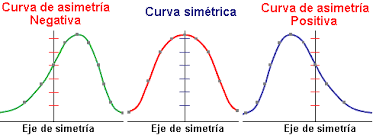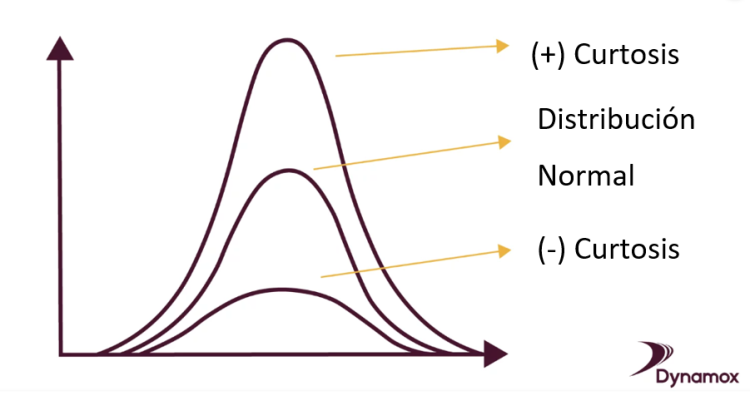

In [ ]:
x['citations'].skew()

7.603335979379173

In [ ]:
x['citations'].kurtosis()

112.08776864599469

#**Análisi de dades. Análisi de correlacions**

**Correlació de Pearson**

¿Es pot explicar les notes d'un alumne segons les hores que es passa estudiant? ¿Es pot explicar la quantitat de pluja a una ciutat segons la temperatura i la humitat que fa? ¿Es pot explicar el nombre d'accidents de trànsit segons la quantitat de vehicles que circulen?

Totes aquestes preguntes es poden respondre recolzant-nos en un paràmetre estadístic que s'anomena coeficient de correlació. El coefiecient de correlació de Pearson ens suggereix com de bé s'adapten les dades a una línia recta quan realitzem un gràfic de punts (scatterplot) entre dues variables. El coeficient de Pearson pot tenir valors de:

- P = 1: Les dades s'ajusten perfectament a una línia recta. Una de les variables explica perfectament l'altra (i viceversa). Normalement aquest fet no es dona i si es donés significaria que són la mateixa variable.

- P = 0: La variable explicativa no prediu gens bé el comportament de l'altra variable. De fet, prediu tant bé l'altra variable com si utilitzéssim la mitjana per predir els valors.

- P = -1: La variable explicativa explica pitjor el comportament de l'altra variable que utilitzar la mitjana.

Entre aquests valors de P, aquells que es consideren que són rellevants solen ser els que estan per damunt de 0.6 i per davall de 0.9. Utilitzant les variables que corresponen a aquests valors del coeficient de correlació s'obtenen bons models de predicció.

In [ ]:
x

,title,abstract,doi,citations,accesses,online_attention,published_datetime,Topic
0,Spin Berry curvature-enhanced orbital Zeeman e...,Berry phases and the related concept of Berry ...,https://doi.org/10.1038/s41567-024-02487-z,0,353,1,22 April 2024,Physics
1,Room-temperature flexible manipulation of the ...,The quantum metric and Berry curvature are two...,https://doi.org/10.1038/s41567-024-02476-2,0,417,44,22 April 2024,Physics
2,Irreversible entropy transport enhanced by fer...,The nature of particle and entropy flow betwee...,https://doi.org/10.1038/s41567-024-02483-3,0,259,1,22 April 2024,Physics
3,Penning-trap measurement of the Q value of ele...,The investigation of the absolute scale of the...,https://doi.org/10.1038/s41567-024-02461-9,0,1733,105,19 April 2024,Physics
4,Distinct elastic properties and their origins ...,"Glasses and gels, common amorphous solids with...",https://doi.org/10.1038/s41567-024-02456-6,0,1297,14,12 April 2024,Physics
...,...,...,...,...,...,...,...,...
3121,An efficient and effective method to identify ...,The identification of key functional biologica...,https://doi.org/10.1038/s43588-020-00009-4,7,4324,3,14 January 2021,Computational Science
3122,Learning properties of ordered and disordered ...,Predicting the properties of a material from t...,https://doi.org/10.1038/s43588-020-00002-x,87,12k,102,14 January 2021,Computational Science
3123,A kinetic ensemble of the Alzheimer’s Aβ peptide,The conformational and thermodynamic propertie...,https://doi.org/10.1038/s43588-020-00003-w,30,5857,34,14 January 2021,Computational Science
3124,Stable maintenance of hidden switches as a str...,In response to severe genetic and environmenta...,https://doi.org/10.1038/s43588-020-00001-y,1,2653,81,14 January 2021,Computational Science


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               3126 non-null   object
 1   abstract            3115 non-null   object
 2   doi                 3126 non-null   object
 3   citations           3126 non-null   int64 
 4   accesses            3126 non-null   object
 5   online_attention    3126 non-null   int64 
 6   published_datetime  3126 non-null   object
 7   Topic               3126 non-null   object
dtypes: int64(2), object(6)
memory usage: 195.5+ KB


In [ ]:
### Només es pot calcular el coeficient de correlació entre dades numèriques

x['citations'].corr(x['online_attention'], method = 'pearson')

-0.04059130927070004

**Correlació de Spearman**

Ens permet calcular un coeficient de correlació similar al de Pearson però per a variables ........

In [ ]:
x['citations'].corr(x['Topic'], method = 'spearman')

0.3102812316324649